In [1]:
import sys
import datetime as dt
import cbpro
import time
import json
import pandas as pd
import technicalanalysis as ta

In [2]:
with open('/Users/paul/Library/Mobile Documents/com~apple~CloudDocs/1 Personal/2 Finances/1 Bank/coinbasepro.json') as f:
    api = json.load(f)

auth_client = cbpro.AuthenticatedClient(api['api_key'], api['api_secret'], api['passphrase'])


In [3]:
product = 'BTC-USD'
currency = 'BTC'
period = 300

In [4]:
# Here we get price for that last day
# getting historical data
prices = pd.DataFrame()
end = dt.datetime.now()
start = end - dt.timedelta(days=1)
historicData = auth_client.get_product_historic_rates(product, granularity=period, start=start, end=end)
historicData = pd.DataFrame(historicData, columns=['date', 'low', 'high', 'open', 'close', 'volume']).sort_values('date', ascending=False).reset_index(drop=True)
prices = pd.concat((prices, historicData))

# adding two other days of data
for i in range(2):
    time.sleep(1)
    end = start
    start = end - dt.timedelta(days=1)
    historicData = auth_client.get_product_historic_rates(product, granularity=period, start=start, end=end)
    historicData = pd.DataFrame(historicData, columns=['date', 'low', 'high', 'open', 'close', 'volume']).sort_values('date', ascending=False).reset_index(drop=True)
    prices = pd.concat((prices, historicData))
    
# converting to readable date
prices.date = pd.to_datetime(prices['date'], unit='s')
prices = prices.sort_values('date').reset_index(drop=True)
prices['ico_id'] = currency
prices['ico_symbol'] = currency
prices = prices[['ico_id', 'ico_symbol', 'date', 'low', 'high', 'open', 'close', 'volume']]

In [5]:
prices

,ico_id,ico_symbol,date,low,high,open,close,volume
0,BTC,BTC,2021-03-19 17:25:00,58708.84,58795.77,58738.55,58763.89,40.416082
1,BTC,BTC,2021-03-19 17:30:00,58770.21,58900.00,58770.22,58827.01,33.687976
2,BTC,BTC,2021-03-19 17:35:00,58723.56,58874.13,58825.03,58771.50,32.022202
3,BTC,BTC,2021-03-19 17:40:00,58721.97,58816.19,58778.70,58773.95,26.783942
4,BTC,BTC,2021-03-19 17:45:00,58737.15,58865.00,58773.95,58797.36,38.481588
...,...,...,...,...,...,...,...,...
859,BTC,BTC,2021-03-22 17:00:00,56627.58,56793.11,56793.11,56649.32,50.051449
860,BTC,BTC,2021-03-22 17:05:00,56577.99,56723.76,56649.32,56643.42,51.480975
861,BTC,BTC,2021-03-22 17:10:00,56620.00,56790.15,56643.41,56722.81,36.971111
862,BTC,BTC,2021-03-22 17:15:00,56634.93,56763.48,56722.80,56763.47,40.621100


In [26]:
ta.signals_stats(ta.sar(prices))

{'total_roi': -0.014200268943415528,
 'holding_roi': -0.034383701188454956,
 'accuracy': 0.29411764705882354,
 'sortino': -0.3351392839653193,
 'max_drawdown': -0.040140351686398956,
 'volatility': 0.025066639070207678,
 'avg_roi': -0.000448968166769135,
 'best_roi': 0.013148081811858559,
 'win_avg_roi': 0.005579054226150992,
 'worst_roi': -0.00907128912802957,
 'loss_avg_roi': -0.002960644163819188,
 'nb_trades': 34}

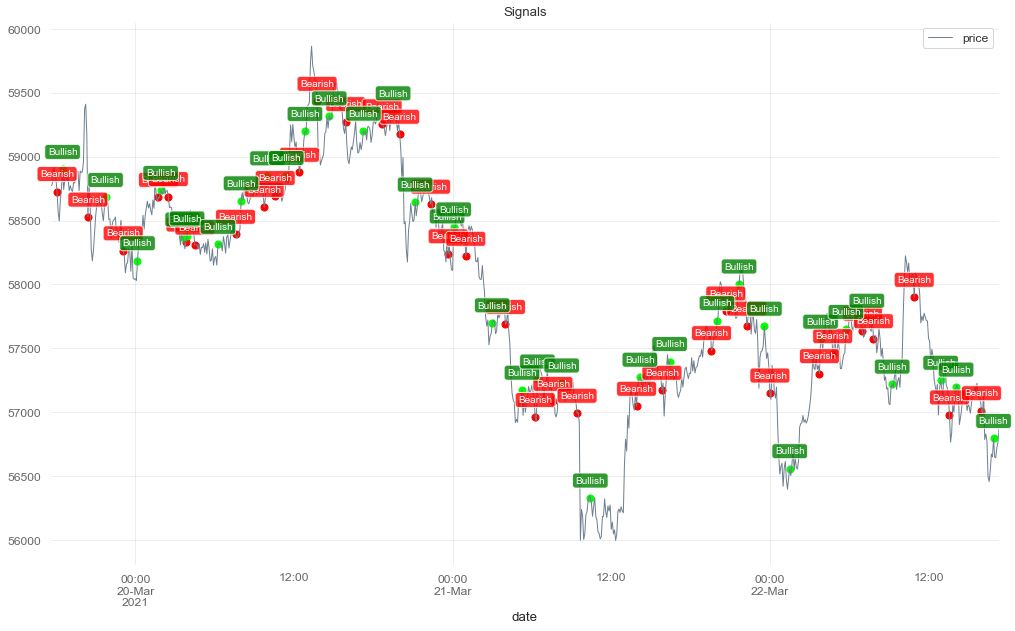

In [27]:
ta.plot_signals(ta.sar(prices))

In [28]:
coinbasepro_fee = .001
trades = ta.get_trades(ta.sar(prices))
first_buy = trades.iloc[0].buy
total_fees = (trades.buy.sum() + trades.sell.sum()) * coinbasepro_fee

fees_to_fund = total_fees / first_buy
fees_to_fund

0.06699331154499151

### Indicator


In [22]:
indicators = ['mama', 'frama', 'sar', 'bop', 'roc', 'adosc']
weights = [0.2768361581920904, 0.06779661016949153, 0.18361581920903955, 0.20056497175141244, 0.05649717514124294, 0.21468926553672316]
threshold = .5
comb = ta.CombinedIndicator(indicators, weights, threshold)
signals = comb.get_signals(prices)

ta.signals_stats(signals)

{'total_roi': -0.019231688937005664,
 'holding_roi': -0.04209798374179812,
 'accuracy': 0.42857142857142855,
 'sortino': -0.46839052042986606,
 'max_drawdown': -0.02848327743525536,
 'volatility': 0.02401912182670896,
 'avg_roi': -0.001359731391618665,
 'best_roi': 0.0071650433967009874,
 'win_avg_roi': 0.005582222659511286,
 'worst_roi': -0.019331751729787627,
 'loss_avg_roi': -0.006566196929966128,
 'nb_trades': 14}

In [25]:
coinbasepro_fee = .005
trades = ta.get_trades(signals)
first_buy = trades.iloc[0].buy
total_fees = (trades.buy.sum() + trades.sell.sum()) * coinbasepro_fee

fees_to_fund = total_fees / first_buy
fees_to_fund

0.13675550330327882